# Seaborn 실습

- 이 자료는 EDA를 하기 위한 seaborn 툴을 알려드리는 자료입니다.
- 커스터마이징에 대한 부분은 거의 다루지 않았습니다. 여러분들은 똑똑하시니까 구글링으로 공부해도 되겠지만 DA팀 오시면 자세하게 배울 수 있으며... 태블로와 같은 다른 시각화툴도 같이 다뤄보실 수 있습니다! DA 오세욤

- 참고사이트
-- https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
-- https://seaborn.github.io/ 

In [ ]:
# seaborn, matplotlib 설치
# !pip install seaborn
# !pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline #notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줍니다!

In [ ]:
# 데이터를 불러오겠습니다
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# 목차

0. countplot
1. pointplot
1. barplot
2. distplot
3. boxplot
4. stripplot
6. heatmap
7. jointplot
8. pairplot
9. regplot

# countplot

- 해당 컬럼에 카데고리별로 데이터가 몇 개가 있는지 표시
- data = dataframe 
- x = column 이름 (명목형)

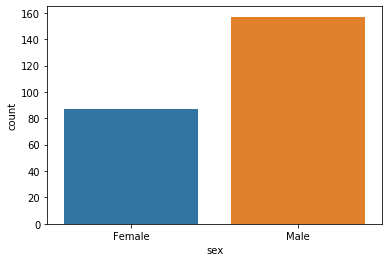

In [ ]:
sns.countplot(x = 'sex', data = tips)

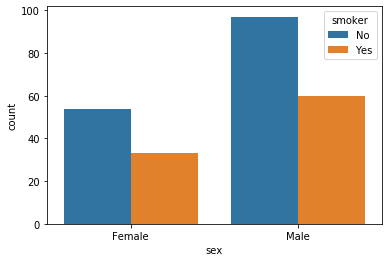

In [ ]:
sns.countplot(x = 'sex', data = tips, hue = 'smoker')
# hue : seaborn의 장점! / 지정하는 카데고리 값에 따라 나눠서 시각화

# barplot

- data = dataframe
- x , y = column 이름 (x 에 명목형 y 에는 실수형)
- defalut 값은 평균으로 나옵니다.
- 막대 위에 보이는 검은 선은 신뢰구간입니다. si = "sd" 하면 표준편차로 바꿀 수 있음

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


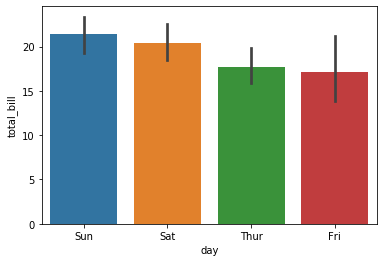

In [ ]:
display(tips)
sns.barplot(x = 'day', y = 'total_bill', data = tips)

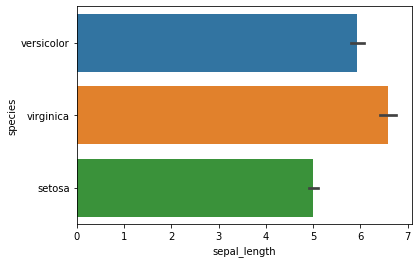

In [ ]:
sns.barplot(x='sepal_length',y='species',data=iris, order =['versicolor','virginica','setosa'])
# order로 나오는 순서를 정할 수 있음

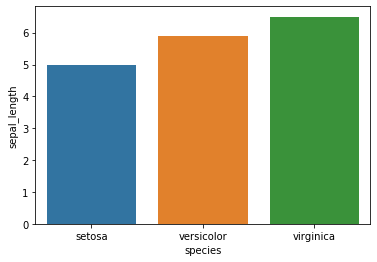

In [ ]:
from numpy import median
sns.barplot(x='species', y='sepal_length', data=iris, estimator = median, ci = False)  #ci 거슬리면 false로 없애기
# estimator로 평균 대신 다른 대푯값으로 조절 가능

# pointplot

- 변화의 추이를 탐색하기에 좋다
- barplot에서 그려진 bar의 높이를 point로 잡고 선으로 이은 그래프
- data = dataframe 
- x, y = column 이름 (x 에 명목형 y 에는 실수형)

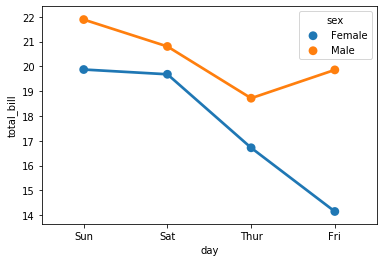

In [ ]:
sns.pointplot(x = 'day', y = 'total_bill', 
              hue = 'sex', data = tips, ci = None)
# ci : size of confidence interval

# distplot

- 히스토그램 같이 분포를 나타낸다.
- input은 실수 값
- 실수형 변수의 분포 모양을 파악한다.

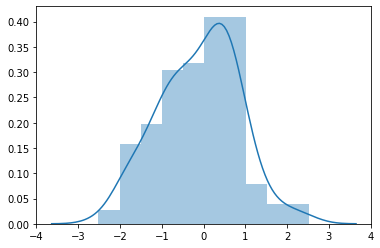

In [ ]:
num = np.random.randn(150)
sns.distplot(num)
# defalut 모양

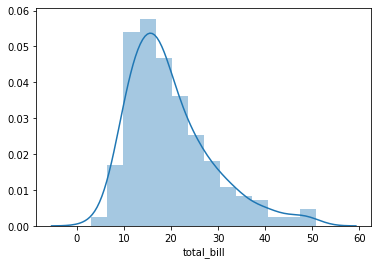

In [ ]:
sns.distplot(tips['total_bill'])

## Appendix: matplotlib histogram

matplotlib으로는 이렇게 히스토그램을 그릴 수 있어요

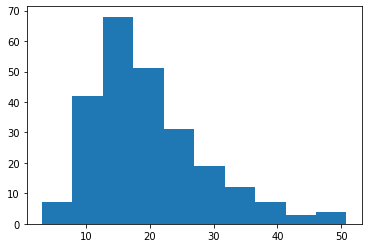

In [ ]:
plt.hist(x = "total_bill", data = tips, bins = 10)
plt.show()

# boxplot

- 박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다. 
- 박스 내부의 가로선은 중앙값을 나타낸다. 
- 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 
- 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

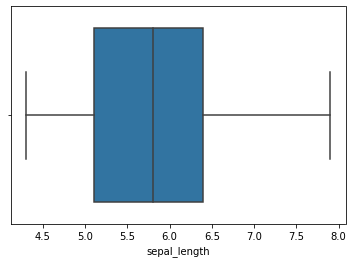

In [ ]:
sns.boxplot(x =iris['sepal_length'] )
#변수 하나: x에 실수형 자료를 주기

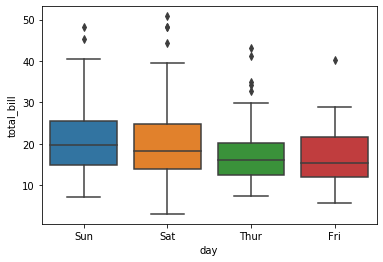

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips)
# 동시에 여러개: x에 명목형, y에 실수형 자료 주기

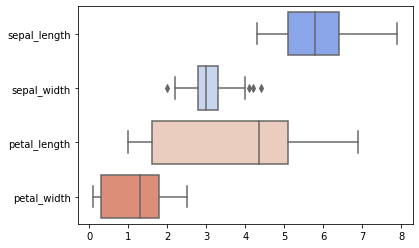

In [ ]:
sns.boxplot(data = iris, palette = 'coolwarm', orient = 'h')
# orient -> 그래프 모양 : h or v

# stripplot

- data = dataframe 
- x, y = column 이름 (x 에 명목형 y 에는 실수형)

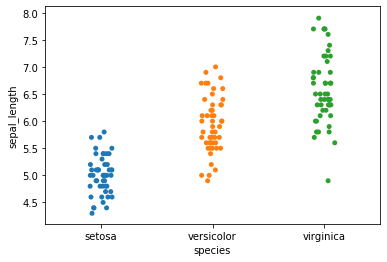

In [ ]:
sns.stripplot(x = 'species', y = 'sepal_length', data = iris)

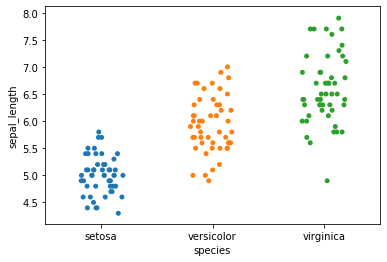

In [ ]:
sns.stripplot(x = 'species', y = 'sepal_length', data = iris, jitter = 0.2 )
#jitter 를 통해 복잡한 분포일 때 보기 편하게 퍼트려줌

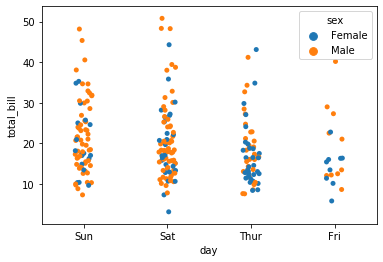

In [ ]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)

# heatmap

- input이 3개 
- 가로, 세로 : 카테고리 값의 변화에 따른 실수 값의 변화 

In [ ]:
# heatmap은 특별한 input data의 형태를 바꿔줘야 합니다.
flights = flights.pivot('month', 'year', 'passengers')

In [ ]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


(12.0, 0.0)

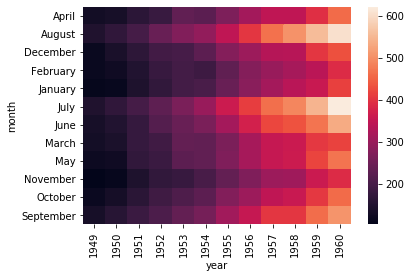

In [ ]:
ax = sns.heatmap(flights)
buttom, top = ax.get_ylim()
ax.set_ylim(buttom + 0.5, top - 0.5)
# seaborn 최신버전에서 히트맵 위아래 끝부분이 깨져요. 그래서 임시방편으로 축의 길이를 이렇게 늘려줍니다.

(12.0, 0.0)

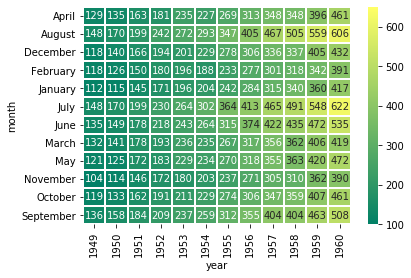

In [ ]:
ax = sns.heatmap(flights, annot = True,   # annot : 숫자나타내기
            fmt = 'd', # fmt : 숫자의 형태(여기서는 정수)
            linewidths = 1, vmin =100, vmax = 650,
            cmap = 'summer' ) #cmap으로 컬러맵조정 # heatmap은 색이 매우 중요!
buttom, top = ax.get_ylim()
ax.set_ylim(buttom + 0.5, top - 0.5)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(4.0, 0.0)

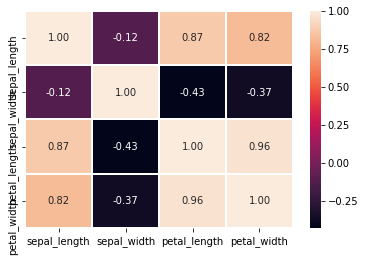

In [ ]:
# 이렇게 모든 값이 실수면 dataframe 자체를 히트맵으로 바꿀 수도 있어요
# 이 때 명목형 자료들은 사라지고 실수형 자료만 그려줘요
ax = sns.heatmap(iris.corr(), annot = True, fmt = ".2f", linewidths = 1)
buttom, top = ax.get_ylim()
ax.set_ylim(buttom + 0.5, top - 0.5)

# jointplot

- data = dataframe 
- x, y = 특정 column 이름 (모두 실수)
- 두 변수간의 관계를 파악하기에 용이(scatter로 그려줌)

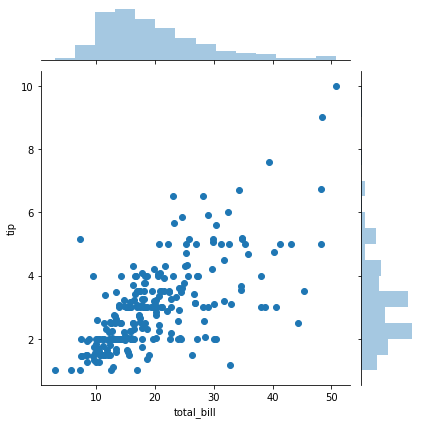

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

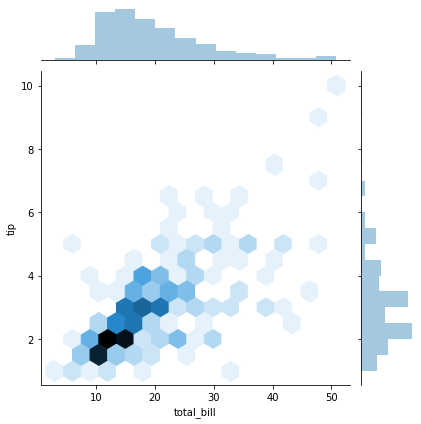

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, 
              kind = 'hex') 
# kind는 차트의 종류

# pairplot

- 이름처럼 pair 로 관계를 그려줍니다.

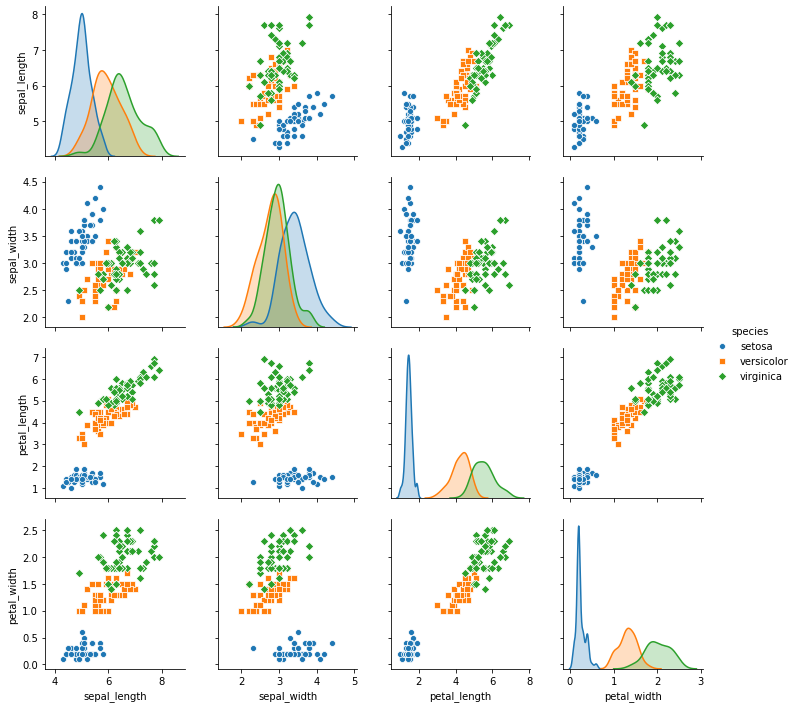

In [ ]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

# regplot

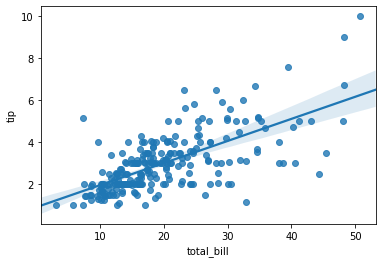

In [ ]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)
#데이터를 가장 잘 설명하는 reg 선을 그려줌

# The end

- seaborn 도 더 많은 파라미터로 커스터마이징 가능하지만 주로 혼자 데이터 분석할 때 사용하니까 굳이... 하지만 다른 사람에게 보여주는 경우에는 시각적으로 보기 좋게 만드는게 좋을 것 입니다. 
- 더 많은 커스터마이징을 위해서는 matplotlib을 공부! +  아 그리고 matplotlib에서 쓰이는 것들은 seaborn에도 적용가능(ex 그래프 크기 조절 등)